<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=550 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. Основы библиотеки PyTorch </b></h2>


<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Этот ноутбук посвящён основам  библиотеки PyTorch.

<h3 style="text-align: center;"><b>Введение</b></h3>

В настоящее время существует множество фреймворков глубокого обучения. Разница между ними заключается во внутренних принципах вычислений. Например, в **[Caffe](http://caffe.berkeleyvision.org/)** и **[Caffe2](https://caffe2.ai/)** вы пишете код, используя некоторые «готовые блоки» "(как и $ LEGO ^ {TM} $ :). В **[TensorFlow](https://www.tensorflow.org/)** и **[Theano](http://deeplearning.net/software/theano/)** вы сначала объявляете граф вычислений, затем компилируйте его и используйте для вывода / обучения (`tf.session ()`). Кстати, теперь в TensorFlow (начиная с версии 1.10) есть функция [Eager Execution](https://www.tensorflow.org/guide/eager), которая может быть полезна для быстрого прототипирования и отладки. **[Keras](https://keras.io/)** - очень популярный и полезный фреймворк DL, который позволяет быстро реализовывать нейронный сети и имеет множество полезных функций.


<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

Мы будем использовать **PyTorch**, поскольку он активно развивается и поддерживается AI-сообществом 

<h3 style="text-align: center;"><b>Установка</b></h3>

Подробную инструкцию по установке PyTorch вы можете найти на [официальном сайте PyTorch](https://pytorch.org/).

## Синтаксис Фреймворка

In [4]:
import torch
torch.__version__

'2.1.0+cu121'

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Давайте посмотрим, как мы можем использовать PyTorch для работы с векторами и тензорами.

Напомним, что **тензор** - это многомерный вектор, например :

`x = np.array ([1,2,3])` - вектор = тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array ([[1, 2, 3], [4, 5, 6]])` - матрица = тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array ([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `-" куб "(3, 3, 3) = тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)


Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из действительных чисел.


### Типы Тензоров

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [ ]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Мы будем использовать только `torch.FloatTensor()` и `torch.IntTensor()`.

Начнем уже что-нибудь писать!

### Создание тензора

In [5]:
a = torch.FloatTensor([1, 2])#в-р строка
a


tensor([1., 2.])

In [15]:
a.shape

torch.Size([2])

In [6]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])# матрица 2на3
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [7]:
b.shape

torch.Size([2, 3])

In [8]:
x = torch.FloatTensor(2,3,4)# тензор 3 строки 4 колонки 2 слоя 

In [9]:
x.shape

torch.Size([2, 3, 4])

In [10]:
x = torch.FloatTensor(100)#100 мерный в-р
x

tensor([-8.5416e+08,  4.5566e-41, -8.5418e+08,  4.5566e-41, -8.5420e+08,
         4.5566e-41, -8.5423e+08,  4.5566e-41, -8.5425e+08,  4.5566e-41,
        -8.5428e+08,  4.5566e-41, -8.5428e+08,  4.5566e-41, -8.5430e+08,
         4.5566e-41, -8.5445e+08,  4.5566e-41, -8.5438e+08,  4.5566e-41,
        -8.5437e+08,  4.5566e-41, -8.5439e+08,  4.5566e-41, -8.5440e+08,
         4.5566e-41, -8.5441e+08,  4.5566e-41, -8.5441e+08,  4.5566e-41,
        -8.5442e+08,  4.5566e-41, -8.5444e+08,  4.5566e-41, -8.5445e+08,
         4.5566e-41, -8.5377e+08,  4.5566e-41, -8.5450e+08,  4.5566e-41,
        -8.5452e+08,  4.5566e-41, -8.5452e+08,  4.5566e-41, -8.5454e+08,
         4.5566e-41, -8.5456e+08,  4.5566e-41, -8.5457e+08,  4.5566e-41,
        -8.5457e+08,  4.5566e-41, -8.5455e+08,  4.5566e-41, -8.6936e+08,
         4.5566e-41, -8.7017e+08,  4.5566e-41, -8.6989e+08,  4.5566e-41,
        -8.6983e+08,  4.5566e-41, -8.6932e+08,  4.5566e-41, -8.6931e+08,
         4.5566e-41, -8.7018e+08,  4.5566e-41, -8.6

In [42]:
x.shape

torch.Size([100, 2])

In [11]:
x = torch.IntTensor(45, 57, 14, 2)# тензор 14 строк 2 столбца 58 слоёв и 45 доп слоёв по 4ому измерению
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен мусором из "случайных номеров":

In [12]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[-744383040,      32518,  110697328,          0],
         [         1,          0,  118411072,          0]],

        [[ 121800496,          0,          0,          0],
         [ 117956688,          0,   81372400,          0]],

        [[-835091536,      32517,          0,          0],
         [         0,          0,          0,          0]]], dtype=torch.int32)

### Инициализации тензоров

In [13]:
x1 = torch.FloatTensor(3, 2, 4)# тензор 3 2 4 состоящий из мусора
x1.zero_() # заполним этот мусорный тензор нулями  
x2 = torch.zeros(3, 2, 4) # сразу создаём тензор 3 2 4 из нулей (как np.zeros())
x3 = torch.zeros_like(x1) # создаём етнзор из нулей , ссылаясь на размены тензора x1
assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Инициализация случайного распределения

In [14]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x

tensor([[ 0.2475, -0.1927,  0.4360],
        [-0.8286, -0.1010, -0.7313]])

In [ ]:
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[1., 0., 0.],
        [1., 1., 0.]])

## Функции в Torch 

У всех функций Numpy есть своя пара в Torch! Осталось теперь вспомнить numpy 🙂

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

### Изменение формы
`np.reshape()` == `torch.view()`:

In [17]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [18]:
b.view(3, 2).shape

torch.Size([3, 2])

In [19]:
b.view(3, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [68]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 (3, 1))

In [74]:
b.view(3, 2), b.view(3, 2).stride()  

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]),
 (2, 1))

**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

In [20]:
b.view(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [21]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [22]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

<img src='https://lh3.googleusercontent.com/proxy/pbQ8C9YLVguU2LzlfE2-57lC3KK3yIRsQnpaTOK9S2UPpopvnZ3JhgeMcT6_kqYL56xq18ZFqddzPhszZg1W9YY--y-qDD2-bJrjVYivMdpQgRqiumwh6PpJYU3cL5Mua9RNeVp6xK0'>

In [23]:
b.reshape(-1) # возвращает view или contigues тензор

tensor([1., 2., 3., 4., 5., 6.])

In [24]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### Изменение типа тензора

In [25]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [26]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [27]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [28]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [29]:
a.to(torch.uint8)

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [30]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Indexing is just like in `NumPy`:

In [31]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [33]:
a[0, 0]

tensor(100.)

In [ ]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

#### Сложение

In [34]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [35]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [36]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [38]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [39]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [40]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [41]:
a.sub(b) # copy

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [42]:
a.sub_(b) # inplace

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [43]:
a

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

#### Умножение (поэлементное)

In [46]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [47]:
a * b

tensor([[-1.0000e+00, -4.0000e+00, -9.0000e+00],
        [-1.0000e+02, -4.0000e+02, -9.0000e+02],
        [ 1.0000e+04,  4.0000e+04,  9.0000e+04]])

In [48]:
a.mul_(b)

tensor([[-1.0000e+00, -4.0000e+00, -9.0000e+00],
        [-1.0000e+02, -4.0000e+02, -9.0000e+02],
        [ 1.0000e+04,  4.0000e+04,  9.0000e+04]])

#### Деление (поэлементное):

In [50]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [51]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [52]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

In [53]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [54]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [55]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [56]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [57]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [58]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [59]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [60]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [61]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

In [62]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [63]:
b[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **универсальных функций**

In [64]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [65]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [66]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [67]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [68]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [69]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [70]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [71]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Агрегация и работа с осями
#### sum, mean, max, min:

#### dim=0 значит что мы складываем строки, dim=1 значит что мы складываем столбцы, dim=2 значит что по слоям

In [74]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [75]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [76]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [81]:
a.mean(dim=0), a.mean(dim=1), a.mean()

(tensor([ 37.,  74., 111.]), tensor([  2.,  20., 200.]), tensor(74.))

#### Применение функции вдоль оси

In [82]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [83]:
a.sum(dim=0) #выполняем операцию по вертикали

tensor([111., 222., 333.])

In [84]:
a.sum(dim=1) #выполняем операцию по горизонтали

tensor([  6.,  60., 600.])

In [85]:
a.max()

tensor(300.)

In [86]:
a.max(0)

torch.return_types.max(
values=tensor([100., 200., 300.]),
indices=tensor([2, 2, 2]))

In [87]:
a.min(1)

torch.return_types.min(
values=tensor([  1.,  10., 100.]),
indices=tensor([0, 0, 0]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max ()` вернула `(100, 200, 300)`, которые являются максимальными элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.

In [88]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

a[:, None, :].shape #добавили фейк размерность для нашего тензора, теперь имеем размер 1 строка 3 столбца 3 слоя

torch.Size([3, 1, 3])

In [89]:
a[:, None, :]

tensor([[[  1.,   2.,   3.]],

        [[ 10.,  20.,  30.]],

        [[100., 200., 300.]]])

In [90]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

#### Безобидная задача на кумулятивные суммы
Дана матрица $M \times N$. Напишите функцию, которая возвращает вектор средних значений по вертикали. 



In [91]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """

    result = A.mean(dim=0)

    return result 

A = torch.FloatTensor([[1, 4], 
                       [2, 7]] )

vertical_means(A)

tensor([1.5000, 5.5000])

**Проблемы:**

* Что такое вертикальная ось? 
* По какой оси необходимо суммировать?
* Как не ошибиться?

**Ответ:** Операции всегда производятся по той оси, которая **исчезнет** после применения операции.

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор --- батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.
    То есть 4мерный тензор размерностями (a, b, c, d) это батч из а штук картинок, b=3 всегда(RGB), c и d это количество пикселей по ширине и высоте

In [92]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """
    m = A.mean(dim=(2,3)) #2-это усреднение по слоям.3-это по картинкам(все a штук).То есть мы посчитали 
                          # среднее значение для каждого канала и теперь будем
                          # поочерёдно вычитать результат каждого слоя у каждой картинки
    
    sigma = A.std(dim =(2, 3))
    result = (A - m[:, :, None, None])/sigma[:, :, None, None]
    # [:, :, None, None] означает что мы создаём тензор [batch_size, num_channels, 1, 1]  где 1,1 - это либо среднее либо дисперсия
    return result

In [94]:
batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape #строка это картинка . колонки это значения средних для трех каналов

torch.Size([64, 3])

In [ ]:
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)

B = normalize_pictures(batch)
# print(B.mean(dim=(2,3)).shape)
# print(B.std(dim=(2,3)))

## Матричные операции

#### Транспонирование тензора

In [99]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [100]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [101]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [102]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [103]:
a.dot(b)

tensor(-141.)

In [104]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [105]:
a @ b

tensor(-141.)

In [106]:
type(a)

torch.Tensor

In [107]:
type(b)

torch.Tensor

In [108]:
type(a @ b)

torch.Tensor

#### Матричное произведение

In [111]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [112]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [113]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [114]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [115]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [116]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

In [117]:
a.mm(b)

tensor([[  279.],
        [ 2790.],
        [27900.]])

Тензор `b` можно развернуть в одномерный массив с помощью функции `torch.view(-1)`, чтобы результат был вектором.
Аналог flatten

In [118]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [119]:
b.view(-1)

tensor([ -1., -10., 100.])

In [120]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [ ]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

##### Каким бы большим тенззор не был бы, произведение двух тензоров идёт опираясь на последние две размерности у каждого.Как и в примере ниже . То есть главное что бы подходили последние две размерности а на все остальное без разницы

In [121]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [122]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.39024758, 0.37516269, 0.26436281],
       [0.8774677 , 0.43401289, 0.13599479],
       [0.01913056, 0.14618925, 0.5704801 ]])

In [125]:
b = torch.from_numpy(a)
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [126]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [127]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [128]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[1.4607e-34, 0.0000e+00, 1.3583e-34, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 1.4013e-45, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 1.1351e-43, 0.0000e+00],
         [1.3667e-34, 0.0000e+00, 1.4662e-34, 0.0000e+00],
         [2.8026e-45, 0.0000e+00, 1.4013e-45, 0.0000e+00]]])

In [ ]:
type(a)

torch.Tensor

In [129]:
x = a.numpy()
x

array([[[1.4606821e-34, 0.0000000e+00, 1.3582966e-34, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
        [0.0000000e+00, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.1350518e-43, 0.0000000e+00],
        [1.3666922e-34, 0.0000000e+00, 1.4661500e-34, 0.0000000e+00],
        [2.8025969e-45, 0.0000000e+00, 1.4012985e-45, 0.0000000e+00]]],
      dtype=float32)

In [130]:
x.shape

(2, 3, 4)

In [131]:
type(x)

numpy.ndarray

In [132]:
x -= x

In [133]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [135]:
def forward_pass(X, w):

    logits = X @ w
    result  = torch.sigmoid(logits)

    return result

In [136]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print('result: {}'.format(result))

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA --- это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA --- это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [140]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.9256, 0.5075, 0.5942,  ..., 0.9141, 0.0274, 0.7524],
        [0.2288, 0.0263, 0.6852,  ..., 0.3472, 0.2267, 0.1040],
        [0.2138, 0.5248, 0.6534,  ..., 0.8186, 0.6782, 0.8427],
        ...,
        [0.5353, 0.7465, 0.4348,  ..., 0.0723, 0.6692, 0.7296],
        [0.8976, 0.9492, 0.8044,  ..., 0.1629, 0.7860, 0.0612],
        [0.8930, 0.5063, 0.1980,  ..., 0.5160, 0.5328, 0.5246]])

In [141]:
x.is_cuda

False

#### Кладём тензор на GPU

In [142]:
!nvidia-smi

Tue Oct 24 14:27:02 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.06              Driver Version: 545.23.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB    On  | 00000000:01:00.0  On |                  N/A |
|  0%   46C    P0              29W / 200W |    325MiB /  6144MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [154]:
x = x.cuda()

In [1]:
!nvidia-smi

Mon Nov 13 18:45:09 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.06              Driver Version: 545.23.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB    On  | 00000000:01:00.0  On |                  N/A |
|  0%   48C    P5              12W / 200W |   5691MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [157]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

x = x.to(device)
x

tensor([[0.9256, 0.5075, 0.5942,  ..., 0.9141, 0.0274, 0.7524],
        [0.2288, 0.0263, 0.6852,  ..., 0.3472, 0.2267, 0.1040],
        [0.2138, 0.5248, 0.6534,  ..., 0.8186, 0.6782, 0.8427],
        ...,
        [0.5353, 0.7465, 0.4348,  ..., 0.0723, 0.6692, 0.7296],
        [0.8976, 0.9492, 0.8044,  ..., 0.1629, 0.7860, 0.0612],
        [0.8930, 0.5063, 0.1980,  ..., 0.5160, 0.5328, 0.5246]],
       device='cuda:0')

Умножим два тензора в GPU и вернём результат обратно на CPU:

In [168]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [169]:
c

tensor([[0.5811, 0.5113, 0.1849,  ..., 0.0328, 0.2753, 0.1033],
        [0.0724, 0.0553, 0.2783,  ..., 0.0991, 0.6167, 0.0410],
        [0.6189, 0.0338, 0.1202,  ..., 0.3376, 0.0928, 0.2793],
        ...,
        [0.3139, 0.0555, 0.0473,  ..., 0.0035, 0.0208, 0.1986],
        [0.6550, 0.0196, 0.6054,  ..., 0.6604, 0.6023, 0.0158],
        [0.0186, 0.2724, 0.6848,  ..., 0.1944, 0.2085, 0.3335]])

In [171]:
a

tensor([[0.6243, 0.7234, 0.5887,  ..., 0.0938, 0.4692, 0.1245],
        [0.2646, 0.9200, 0.3733,  ..., 0.6721, 0.7970, 0.0567],
        [0.8647, 0.0436, 0.4293,  ..., 0.9946, 0.6431, 0.3182],
        ...,
        [0.3493, 0.2945, 0.9696,  ..., 0.0070, 0.0283, 0.5945],
        [0.7724, 0.3272, 0.6199,  ..., 0.8582, 0.6712, 0.0862],
        [0.4830, 0.3770, 0.7821,  ..., 0.5510, 0.3429, 0.4212]])

In [170]:
!nvidia-smi

torch.cuda.empty_cache()
!nvidia-smi

Tue Oct 24 14:38:25 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.06              Driver Version: 545.23.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 6GB    On  | 00000000:01:00.0  On |                  N/A |
|  0%   47C    P2              28W / 200W |   1936MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#### Тензоры из разных областей памяти не совместимы:

In [163]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [164]:
a + b

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

### Пример работы на GPU

In [172]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [176]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

tensor([[[1.8669, 1.2779, 1.8022, 1.8385, 1.7843],
         [1.5898, 1.1724, 1.4296, 1.1592, 1.9778],
         [1.0798, 1.1900, 1.8691, 1.0152, 1.5721],
         [1.5063, 1.9247, 1.8918, 1.3984, 1.6378],
         [1.7121, 1.8122, 1.7937, 1.1651, 1.1633]],

        [[1.8704, 1.0918, 1.0321, 1.4995, 1.7637],
         [1.8663, 1.5640, 1.6928, 1.0307, 1.8611],
         [1.1872, 1.1207, 1.3585, 1.9986, 1.1430],
         [1.8495, 1.2917, 1.5477, 1.3541, 1.0491],
         [1.3937, 1.8749, 1.1541, 1.6344, 1.2377]],

        [[1.5307, 1.2166, 1.0228, 1.8944, 1.7117],
         [1.6285, 1.4943, 1.5744, 1.0666, 1.7803],
         [1.3150, 1.6604, 1.3856, 1.4409, 1.4501],
         [1.5528, 1.4904, 1.4337, 1.6429, 1.4714],
         [1.1195, 1.1282, 1.4445, 1.9321, 1.7881]],

        [[1.2047, 1.4405, 1.4778, 1.6183, 1.6000],
         [1.0911, 1.8254, 1.5716, 1.4746, 1.1965],
         [1.4557, 1.6571, 1.6721, 1.3383, 1.6573],
         [1.9087, 1.8926, 1.6359, 1.9865, 1.9802],
         [1.4456, 1.5829,

## AutoGrad

За что мы любим PyTorch --- за то, что в нём можно автоматически дифференцировать функции! Об этом можно было бы только мечтать в Numpy. Дифференцирование функций происходит по формуле производной композиции.

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений, в отличие от Tensorflow, строится динамически. Давайте посмотрим, как это работает.

#### Задание. Реализуйте обучение в логистической регрессии

# Разберем пример: применим линейную регрессию цен на жилье в Бостоне.

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [213]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [212]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [18]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


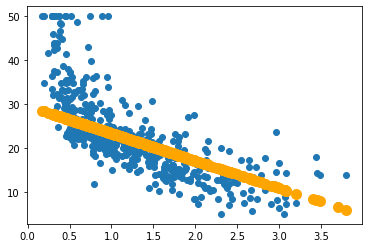

loss =  44.59417


In [19]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()


    # Делаем шаг градиентного спуска по матрице весов
    w.data -= 0.05*w.grad.data
    b.data -= 0.05*b.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()



    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

### Посмотрим градиенты на примере двухслойной сети

In [228]:
dtype = torch.float
device = torch.device("cuda:0")
# device = torch.device("cuda:0") # Раскомментируйте это, чтобы запустить на GPU

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что нам не нужно вычислять градиенты
# по отношению к этим тензорам во время обратного прохода.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Создаем тензоры случайных весов.
# Настройка requires_grad = True указывает, что мы хотим вычислять градиенты с
# уважение к этим тензорам во время обратного прохода.

# Create random Tensors for weights.
# Установка requires_grad = True указывает, что мы хотим вычислить градиенты 
# относительно этих тензоров во время обратного прохода.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [229]:
y_pred = (x @ w1).clamp(min=0).matmul(w2) #clamp это ReLu применённая к x @ w1
loss = (y_pred - y).pow(2).sum()

# вычисляем градиенты
loss.backward()

In [230]:
print((y_pred - y).pow(2).sum())

tensor(2811.8911, device='cuda:0', grad_fn=<SumBackward0>)


In [231]:
w1.grad, w2.grad

(tensor([[ -147.9937, -1827.7697,    86.2018],
         [  737.2134,  -303.7419,  -192.3253],
         [ -386.1683, -1228.4673,    88.5735]], device='cuda:0'),
 tensor([[-109.5574,  -14.9264,  -89.9794,  100.6564,  -19.9209,  -64.0481,
            19.1631,   24.1564,   15.2457,   28.5994],
         [-736.7488,  176.2600, -130.9250,  630.0798, -225.4600,  -66.8208,
           -66.3465,  -64.3524,  231.9374,  385.3255],
         [  -0.8347,   -3.0629,  -16.8688,   28.2026,    6.4489,  -13.1739,
            12.9955,    1.0036,    2.1780,   20.4090]], device='cuda:0'))

In [232]:
loss.grad # нет доступа к нелистовым градиентам в дереве AD

/tmp/ipykernel_12585/1930231510.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  loss.grad # нет доступа к нелистовым градиентам в дереве AD


In [233]:
# заставляем переменную запоминать градиенты функции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad()

loss.backward()

In [234]:
loss.grad

tensor(1., device='cuda:0')

In [235]:
x.grad # не требует градиента

In [236]:
y.grad # не требует градиента

**Замечание:** Градиенты помещаются в поле `.grad` тензоров, по которым они вычисляются.

In [239]:
w1

tensor([[ 0.1923, -1.1600,  0.5141],
        [ 0.6717,  0.1166,  0.1847],
        [-0.3274, -1.3964,  0.3200]], device='cuda:0', requires_grad=True)

In [ ]:
with torch.no_grad():
  
    pass

## Дополнительные материалы

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*

In [3]:
X = int(input())
print(X//60)

512
8


In [9]:
X%60

32